<a href="https://colab.research.google.com/github/charlestreiber/Projeto_Lisboa/blob/main/Projeto_Lisboa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb -   *Lisboa* 
<img alt="Colaboratory logo" width="70%" height="40%" src="https://dynamic-media-cdn.tripadvisor.com/media/photo-o/15/4d/46/f6/lisbon-district.jpg?w=700&h=500&s=1/center">

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Lisboa, e ver quais insights podem ser extraídos a partir de dados brutos.**

##**Uma breve história sobre Lisboa**
Lisboa foi fundada pelos fenícios sob o nome de Alis Ubbo (“porto seguro”) e pouco tempo depois foi conquistada pelos gregos e cartaginenses. Lisboa passou a ser a capital da Lusitânia Romana, passando a se chamar Olissipo. Com a queda dos romanos, passou a fazer parte do reino suevo de Galícia até 585.     
Lisboa fica no litoral sul de Portugal e tem temperaturas agradáveis durante quase todo ano. As melhores oportunidades de emprego estão lá. Também é na capital portuguesa que estão as melhores universidades do país, como a Universidade de Lisboa.     
**A área metropolitana tem cerca de 2,846 milhões (2019)**  
O clima é quente e temperado. Existe muito mais pluviosidade no inverno do que no verão.          
16.7 °C é a temperatura média.   
*Fonte:* <a h ref="https://www.lisboa.net/historia#:~:text=Lisboa%20foi%20fundada%20pelos%20fen%C3%ADcios,suevo%20de%20Gal%C3%ADcia%20at%C3%A9%20585.">Lisboa.net</a>

<img alt="Colaboratory logo" width="30%" src="https://www.europadestinos.com.br/wp-content/uploads/2018/02/portugal-mapa.jpg"> 

Mapa de Portugal



##Biblioteca *pandas*: <img alt="Colaboratory logo" width="20%" src=https://miro.medium.com/max/748/1*wP8ubuQEIrtxtfd-DTOTig.jpeg>
A biblioteca Pandas é uma biblioteca Python para análise de dados. Seu nome é derivado do termo “dados de painel” (panel data), um termo econométrico utilizado para se referir a conjuntos de dados estruturados multidimensionais. Ela possui código aberto e uso gratuito (sob uma licença BSD).

O Pandas é construído com base em duas bibliotecas mais famosas do Python: matplotlib para visualização de dados e NumPy para operações matemáticas. O Pandas é uma união dessas bibliotecas, permitindo que você acesse muitos dos métodos de matplotlib e NumPy com menos código.

A biblioteca Pandas é conhecida por sua alta produtividade e alto desempenho. Ela é  bastante popular porque torna a importação e a análise de dados muito mais fácil.

Antes da criação do Pandas, a maioria dos analistas usava Python para a preparação de dados e, em seguida, mudava para outra linguagem de programação mais específica para lidar com Big Data (como a linguagem R) para executar o restante do fluxo de trabalho.    
*Fonte:* <a href="https://www.voitto.com.br/blog">Voitto</a>

##Biblioteca Seaborn <img alt="Colaboratory logo" width="20%" src=https://seaborn.pydata.org/_static/logo-wide-lightbg.svg>
O Seaborn é uma biblioteca de visualização de dados do Python baseado no Matplotlib. Ele provê uma interface de alto nível para construção de gráficos estatísticos atrativos e informativos.  
*Fonte:* <a h ref="https://seaborn.pydata.org/index.html">seaborn.pydata.org</a>

#### Primeiramente importamos as bibliotecas necessárias

In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Em seguida importamos o arquivo csv com os dados da cidade de Lisboa
<a href=http://insideairbnb.com/get-the-data.html>insideairbnb</a> <img alt="Colaboratory logo" width="5%" src=https://www.techsoupbrasil.org.br/sites/default/files/airbnblogo.png>

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("/content/drive/MyDrive/listings.csv")

##Análise dos Dados

**Dicionário das variáveis**

* `id` - Número de id gerado para identificar o imóvel
* `name` - Nome da propriedade anunciada
* `host_id` - Número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - Está coluna não contém nenhum valor válido
* `neighbourhood` - Nome do bairro
* `latitude` - Coordenada da latitude da propriedade
* `longitude` - Coordenada da longitude do bairro
* `room_type` - Informa o tipo de quarto que é fornecido
* `price` - Preço para alugar o imóvel
* `minimum_nights` - Quantidade mínima de noites para reservar
* `number_of_reviews` - Número de reviews (avaliações) que a propriedade possui
* `last_review` - Data do último review (avaliação)
* `reviews_per_month` - Quantidade de reviews (avaliações) por mês
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião 
* `availability_365` - Número de dias de disponibilidade dentro de 365 dias 



###Os hóspedes do Airbnb podem deixar uma avaliação após sua estadia, e isso pode ser usado como um indicador de atividade do airbnb.

###Casas ou apartamentos inteiros com alta disponibilidade para turistas durante todo o ano, provavelmente sem a presença do proprietário, podem ser ilegais e, mais importante, estão deslocando residentes.

#### Mostramos as cinco primeiras entradas do nosso dataset

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,40,3,27,2021-01-26,0.32,1,83
1,25659,Heart of Alfama Lisbon Center - Cœur de l'Alfama,107347,Ellie,Lisboa,Santa Maria Maior,38.71241,-9.12706,Entire home/apt,45,3,114,2019-11-08,1.30,1,305
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71082,-9.12719,Entire home/apt,50,3,328,2019-10-29,2.77,1,143
3,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71156,-9.12987,Entire home/apt,53,2,274,2020-11-26,2.74,1,303
4,29720,TheHOUSE - Your luxury home,128075,Francisco,Lisboa,Estrela,38.71108,-9.15979,Entire home/apt,1114,2,55,2020-03-11,0.84,1,349


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**
##### Nosso dataset possui 16 variáveis e 19458 entradas

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 19458
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
##### Podemos ver que nosso dataset possui uma porcentagem muito baixa de valores ausentes, a variável com o maior número de valores ausentes é a variável reviews_per_month com 0,183626%

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.183626
last_review                       0.183626
host_name                         0.001079
name                              0.000514
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

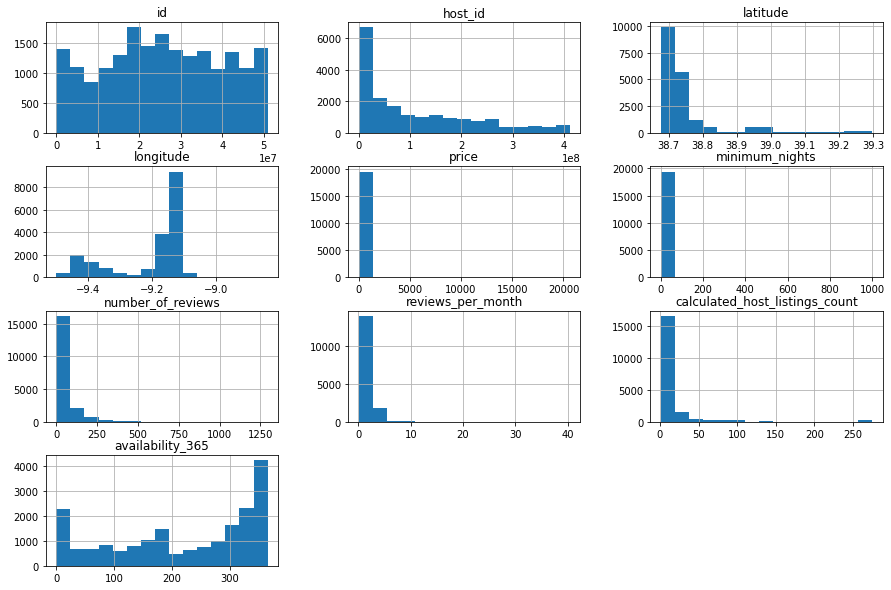

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,19458.000000,19458.000000,19458.000000,15885.000000,19458.000000,19458.000000
mean,108.296022,3.850396,42.815860,1.179506,14.212560,218.978878
std,281.433465,16.737444,69.092684,1.304506,36.725234,125.645147
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,50.000000,1.000000,1.000000,0.250000,1.000000,113.000000
50%,72.000000,2.000000,12.000000,0.770000,4.000000,251.000000
75%,110.000000,3.000000,55.000000,1.730000,11.000000,335.000000
max,20628.000000,1000.000000,1294.000000,40.450000,275.000000,365.000000


<img alt="Colaboratory logo" width="20%" src= https://media.istockphoto.com/photos/thinking-drawing-man-picture-id450115639>

## O que são outliers?
“Um outlier é uma observação que se diferencia tanto das demais observações que levanta suspeitas de que aquela observação foi gerada por um mecanismo distinto” (Hawkins, 1980), em outras palavras os outliers são dados que se distanciam radicalmente de todos os outros São pontos fora da curva normal, valores que fogem da normalidade e que podem causar desequilíbrio nos resultados obtidos.   
<a href=http:https://pt.wikipedia.org/wiki/Outlier>https://pt.wikipedia.org/wiki/Outlier</a>

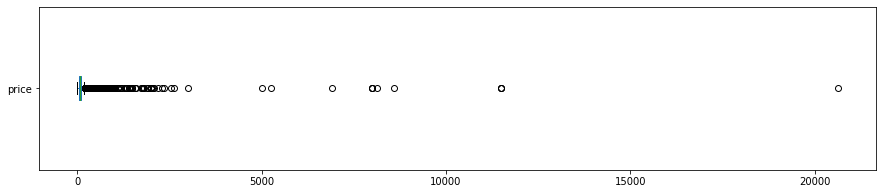


price: valores acima de 600
189 entradas
0.9713%


In [ ]:
# Fazer um boxsplot da variável price para analisar os outliers
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

print("\nprice: valores acima de 600")
print("{} entradas".format(len(df[df.price > 600])))
print("{:.4f}%".format((len(df[df.price > 600]) / df.shape[0])*100))

Com este gráfico achamos 189 entradas (outliers) acima do valor de €600 (seissentos euros), o que representou 0,9713%.  
€600 será nosso valor de corte, analisaremos todos os dados abaixo desse valor para termos uma análise mais precisa.

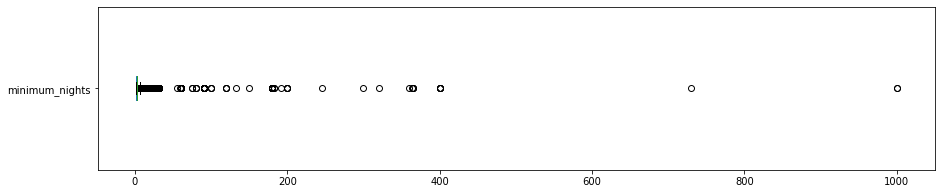


minimum_nights: valores acima de 30
95 entradas
0.4882%


In [ ]:
# Faremos um boxsplot da variável Minimun_nights para detectar outlier que estiverem acima de 30 dias
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

print("\nminimum_nights: valores acima de 30")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

Achamos 95 entradas (outliers) acima de 30 dias, o que significa 0,4882% dos dados. 
Retiraremos estás 95 entradas para termos uma análise mais próxima da realidade.

### Após está análise inicial notamos a presença de outliers nas variáveis **price** e **minimum_nights**, então faremos uma limpeza de dados, para deixar os dados mais precisos.

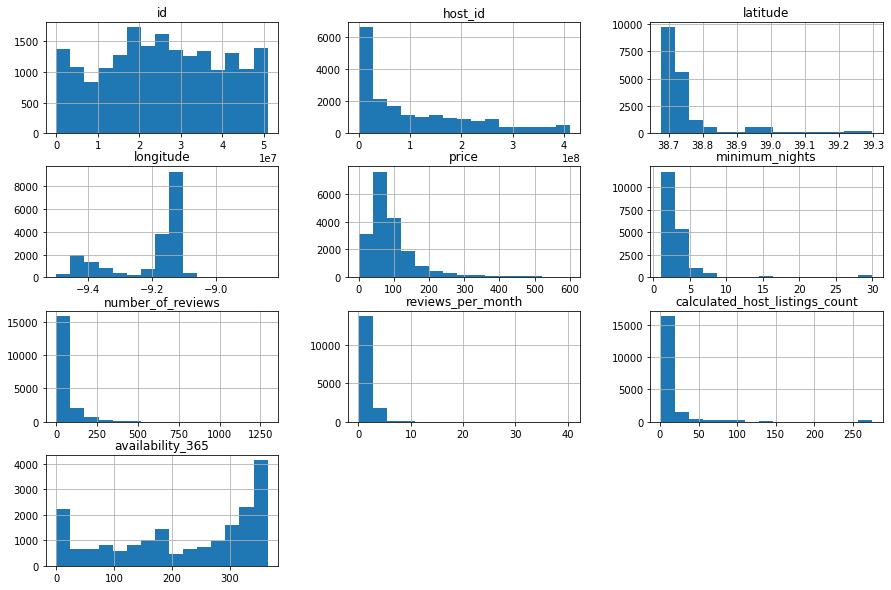

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 600].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# novo histograma
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**
A média é €108,29 Euros  
**Valor do Euro convertido para o Real hoje (*agosto 2021*):**  R$6,19

In [ ]:
# ver a média da coluna price
df[['price']].describe()

,price
count,19458.000000
mean,108.296022
std,281.433465
min,0.000000
25%,50.000000
50%,72.000000
75%,110.000000
max,20628.000000


### **Q4. Qual a correlação existente entre as variáveis**
A correlação de maneira objetiva é negativa, isso mostra que a diminuição de uma variável causa o aumento de outra e vice-versa.

ex: a diminuição da disponibilidade durante o ano causa um aumento do preço do imóvel

In [ ]:
# criar uma matriz de correlação
df_clean = df.copy()
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.010641,-0.059470,-0.052881,-0.005041,0.028553
minimum_nights,-0.010641,1.000000,-0.027563,-0.038448,-0.025673,-0.015372
number_of_reviews,-0.059470,-0.027563,1.000000,0.740668,-0.084877,-0.009322
reviews_per_month,-0.052881,-0.038448,0.740668,1.000000,-0.061854,0.021609
calculated_host_listings_count,-0.005041,-0.025673,-0.084877,-0.061854,1.000000,0.045608
availability_365,0.028553,-0.015372,-0.009322,0.021609,0.045608,1.000000


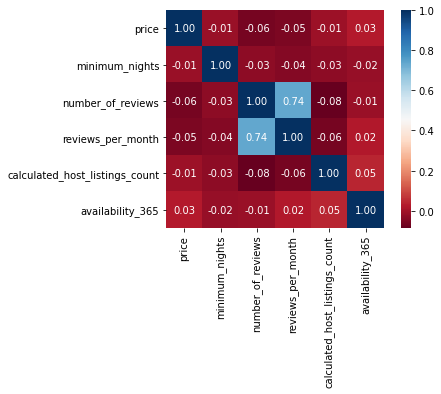

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb em Lisboa?**
Em primeiro lugar fica entire home/apt (casa/apartamento inteiro) com 14484 imóveis disponíveis.
Em segundo lugar fica Private room (quarto privado) com 4257 imóveis disponíveis.


In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    14484
Private room        4257
Hotel room           365
Shared room          352
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.744372
Private room       0.218779
Hotel room         0.018758
Shared room        0.018090
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset? e qiajl a mais barata?**
<img alt="Colaboratory logo" width="10%" src=http://www.paginas-nacionais.pt/imag_e/201709130227BRASAO.JPG> 
###O bairro de Alguber, com a média de preço no valor de €480 (quatrossentos e oitenta euros) é o bairro mais caro.
E o bairro mais barato é Pvoa de Santo Adrio e Olival de Basto no valor de €32,37 (trinta e dois euros e trinta e sete centimos).

In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:200]

neighbourhood
Alguber                                  480.000000
Ota                                      465.000000
Freiria                                  320.000000
Cardosas                                 298.000000
Vermelha                                 276.500000
                                            ...    
Encosta do Sol                            40.785714
Vila Franca de Xira                       36.214286
Mina de gua                               34.590909
Casal de Cambra                           33.500000
Pvoa de Santo Adrio e Olival de Basto     32.375000
Name: price, Length: 128, dtype: float64

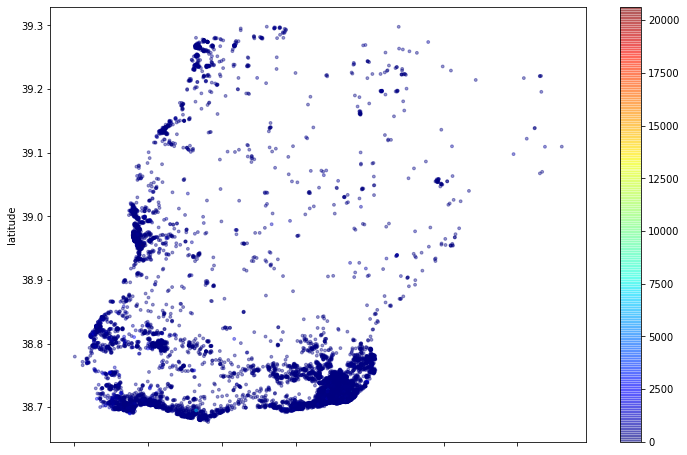

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**
A média é de 3,85 noites

In [ ]:
# ver a média da coluna minimum_nights
df['minimum_nights'].describe()['mean']

3.8503957241237536

## Conclusões
Foi feita uma análise superficial na base de dados do airbnb.               
Nota-se um valor médio de aluguel bem alto para o padrão brasileiro, e uma grande demanda por casas/apartamentos inteiros, não compartilhados, a média de noites mínimas também é alta.   
Lembra-se que este dataset é uma versão resumida, ideal para análises iniciais, recomenda-se uma análise mais profunda com um dataset com um número maior de dados.  
Por fim, mostrando o pensamento objetivo de seu analista que sou eu!
Gostaria de expressar que independente de qual bairro ficar, ou qual tipo de imóvel você alugar, nada vai ser igual a está experiência de estadia neste país lindo e exotico, então aproveite!

